In [1]:
import numpy as np
from matplotlib import pyplot
from numpy.random import normal
from scipy.stats import norm

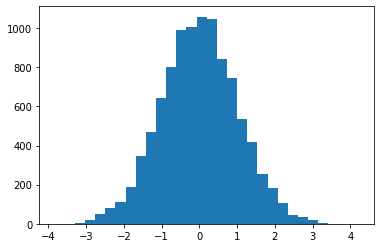

In [3]:
sample = normal(size = 10000) # Generador 
pyplot.hist(sample, bins = 30)
pyplot.show()

### Estimación Paramétrica

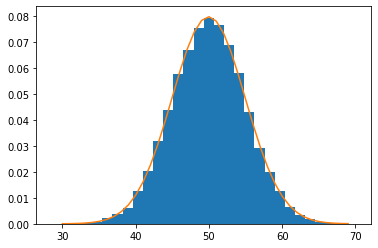

In [6]:
sample = normal(loc=50, scale=5, size=20000) # mu = 50, sigma = 5
mu = sample.mean()
sigma = sample.std()
dist = norm(mu, sigma)
values = [value for value in range(30, 70)]
probabilidades = [dist.pdf(value) for value in values]
pyplot.hist(sample, bins=30, density=True)
pyplot.plot(values, probabilidades)
pyplot.show()

### Estimación no Paramétrica

In [7]:
from numpy import hstack
from sklearn.neighbors import KernelDensity

#Construimos una distribución binomial
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))

model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)

KernelDensity(algorithm='auto', atol=0, bandwidth=2, breadth_first=True,
              kernel='gaussian', leaf_size=40, metric='euclidean',
              metric_params=None, rtol=0)

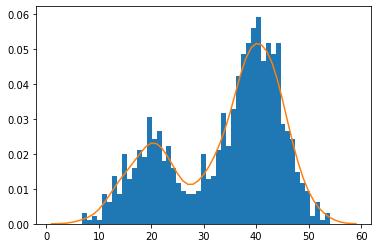

In [9]:
values = np.asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values) # Probabilidad logarítmica
probabilities = np.exp(probabilities) # Inversión de Probabilidad

pyplot.hist(sample, bins=50, density=True)
pyplot.plot(values, probabilities)
pyplot.show()